<a href="https://colab.research.google.com/github/danwein8/DNP_DataAnalysis/blob/main/Copy_of_DNP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# read in excel spreadsheet
data = pd.read_excel("NoShowData.xlsx")

In [ ]:
data.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT
0,311,28,BLK,M,Y,Unemployed,Y,SINGLE,2016.0,Y,Y,Y,Y,Y
1,601,23,BLK,M,Y,employed,Y,SINGLE,2021.0,Y,Y,Y,Y,Y
2,762,32,BLK,M,Y,Unemployed,Y,SINGLE,2017.0,Y,Y,Y,Y,Y
3,991,32,BLK,M,Y,employed,Y,SINGLE,2018.0,Y,Y,Y,Y,Y
4,869,29,BLK,M,Y,employed,Y,SINGLE,2018.0,Y,Y,Y,Y,Y
5,669,29,BLK,M,Y,employed,Y,SINGLE,NaN,Y,Y,Y,Y,Y
6,455,25,BLK,M,Y,Unemployed,Y,SINGLE,2018.0,Y,Y,Y,Y,Y
7,761,25,BLK,M,Y,Unemployed,Y,SINGLE,2017.0,Y,Y,Y,Y,Y
8,655,24,BLK,M,Y,employed,Y,SINGLE,2020.0,Y,Y,Y,Y,Y
9,285,32,BLK,M,Y,employed,Y,SINGLE,2014.0,Y,Y,Y,Y,Y


In [ ]:
# Replace NULL values in Y/O_DIAGNOSIS with mean of the column
meanVal = data["YEAR_DIAGNOSIS"].mean()
data["YEAR_DIAGNOSIS"].fillna(value=meanVal, inplace=True)
data.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT
0,311,28,BLK,M,Y,Unemployed,Y,SINGLE,2016.000000,Y,Y,Y,Y,Y
1,601,23,BLK,M,Y,employed,Y,SINGLE,2021.000000,Y,Y,Y,Y,Y
2,762,32,BLK,M,Y,Unemployed,Y,SINGLE,2017.000000,Y,Y,Y,Y,Y
3,991,32,BLK,M,Y,employed,Y,SINGLE,2018.000000,Y,Y,Y,Y,Y
4,869,29,BLK,M,Y,employed,Y,SINGLE,2018.000000,Y,Y,Y,Y,Y
5,669,29,BLK,M,Y,employed,Y,SINGLE,2018.285714,Y,Y,Y,Y,Y
6,455,25,BLK,M,Y,Unemployed,Y,SINGLE,2018.000000,Y,Y,Y,Y,Y
7,761,25,BLK,M,Y,Unemployed,Y,SINGLE,2017.000000,Y,Y,Y,Y,Y
8,655,24,BLK,M,Y,employed,Y,SINGLE,2020.000000,Y,Y,Y,Y,Y
9,285,32,BLK,M,Y,employed,Y,SINGLE,2014.000000,Y,Y,Y,Y,Y


In [ ]:
data["YEAR_DIAGNOSIS"].describe()

count      30.000000
mean     2018.285714
std         2.082060
min      2013.000000
25%      2018.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: YEAR_DIAGNOSIS, dtype: float64

In [ ]:
# Change column values to binary values where possible
# 1 is yes, 0 is no in all cases
job = {'employed' : 1, 'Unemployed' : 0}
data.JOB = [job[item] for item in data.JOB]
reminder = {'Y' : 1, 'N' : 0}
data.REMINDER1 = [reminder[item] for item in data.REMINDER1]
data.REMINDER2 = [reminder[item] for item in data.REMINDER2]
data.REMINDER3 = [reminder[item] for item in data.REMINDER3]
binary = {'Y' : 1, 'N' : 0}
data.NEWAPPT = [binary[item] for item in data.NEWAPPT]
data.HIST_PT_NO_SHOW = [binary[item] for item in data.HIST_PT_NO_SHOW]
data['HIV+'] = [binary[item] for item in data['HIV+']]
marital = {'MARRIED' : 1, 'SINGLE' : 0}
data.MARITAL_STATUS = [marital[item] for item in data.MARITAL_STATUS]

In [ ]:
data.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT
0,311,28,BLK,M,1,0,1,0,2016.000000,1,1,1,1,Y
1,601,23,BLK,M,1,1,1,0,2021.000000,1,1,1,1,Y
2,762,32,BLK,M,1,0,1,0,2017.000000,1,1,1,1,Y
3,991,32,BLK,M,1,1,1,0,2018.000000,1,1,1,1,Y
4,869,29,BLK,M,1,1,1,0,2018.000000,1,1,1,1,Y
5,669,29,BLK,M,1,1,1,0,2018.285714,1,1,1,1,Y
6,455,25,BLK,M,1,0,1,0,2018.000000,1,1,1,1,Y
7,761,25,BLK,M,1,0,1,0,2017.000000,1,1,1,1,Y
8,655,24,BLK,M,1,1,1,0,2020.000000,1,1,1,1,Y
9,285,32,BLK,M,1,1,1,0,2014.000000,1,1,1,1,Y


In [ ]:
# Create dummy values for the 'ATTEND_NEW_APPOINTMENT' column because its not 
# yes or no, its yes or rescheduled or no (even if there were no 'no shows')
data1 = pd.get_dummies(data, columns= ['PT_ATTEND_NEW_APT'])
data1.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT_R,PT_ATTEND_NEW_APT_Y
0,311,28,BLK,M,1,0,1,0,2016.000000,1,1,1,1,0,1
1,601,23,BLK,M,1,1,1,0,2021.000000,1,1,1,1,0,1
2,762,32,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1
3,991,32,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1
4,869,29,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1
5,669,29,BLK,M,1,1,1,0,2018.285714,1,1,1,1,0,1
6,455,25,BLK,M,1,0,1,0,2018.000000,1,1,1,1,0,1
7,761,25,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1
8,655,24,BLK,M,1,1,1,0,2020.000000,1,1,1,1,0,1
9,285,32,BLK,M,1,1,1,0,2014.000000,1,1,1,1,0,1


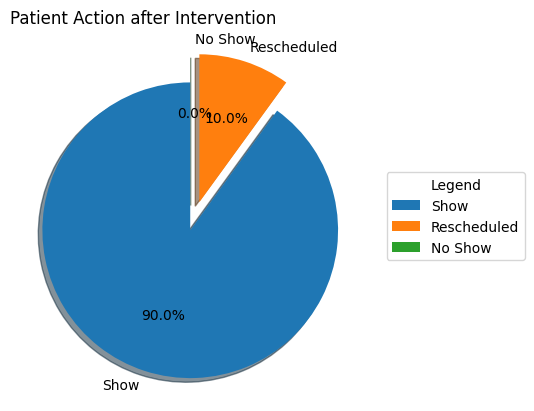

In [ ]:
explode = (0.1, 0.1, 0.1)
labels = ['Show', 'Rescheduled', 'No Show']
title = 'Patient Action after Intervention'
sizes = [data1.PT_ATTEND_NEW_APT_Y.sum() / data1.shape[0],
         data1.PT_ATTEND_NEW_APT_R.sum() / data1.shape[0],
         0]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.legend(labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title(title, loc='left')

plt.savefig("PieExplode.png")
 
plt.show()

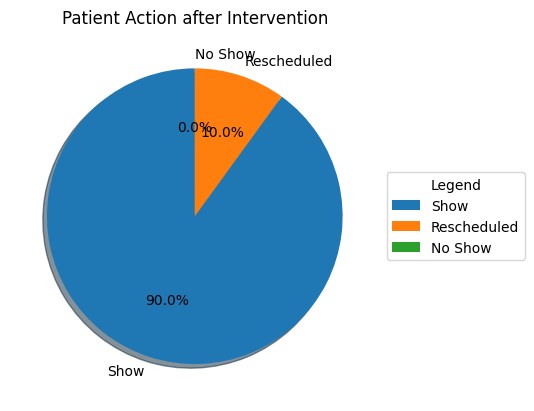

In [ ]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.legend(labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title(title)

plt.savefig("PieRegular.png")
 
plt.show()

#PIE CHART ANALYSIS
The pie chart shows that after the intevention was taken, all of the patients that had a history of not showing up for their appointments took action to either show up for their next appointment, or reschedule it with the clinic. According to the analysis, 90% of the patients that recieved intervention showed up to the appointment and the other 10% called to reschedule. Not a single patient in the study missed, or failed to reschedule their appointment.

In [ ]:
data1.corr()

,PATIENT_ID,AGE,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT_R,PT_ATTEND_NEW_APT_Y
PATIENT_ID,1.000000,0.132446,NaN,0.081777,NaN,NaN,0.048652,NaN,NaN,NaN,NaN,-0.103177,0.103177
AGE,0.132446,1.000000,NaN,0.414732,NaN,NaN,-0.220321,NaN,NaN,NaN,NaN,0.054141,-0.054141
HIV+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,0.081777,0.414732,NaN,1.000000,NaN,NaN,0.194633,NaN,NaN,NaN,NaN,0.201008,-0.201008
HIST_PT_NO_SHOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARITAL_STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_DIAGNOSIS,0.048652,-0.220321,NaN,0.194633,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.116311,-0.116311
NEWAPPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REMINDER1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REMINDER2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#CORRELATION TABLE ANALYSIS
The coefficient correlation chart above reveals a few things. According to the slight positive correlation between JOB and PT_ATTEND_NEW_APT_R, we can surmise that a patient  was more likely to call to reschedule the second appointment after intervention if they were employed. Due to the slight negative correlation between JOB and PT_ATTEND_NEW_APT_Y, we can also tell that patients were more likely to show up to the second appointment after intervention if they were unemployed. Also patients who had been diagnosed longer ago were slightly more likely to show up after intervention while newer diagnosed patients are more likely to call to reschedule after intervention according to the slight positive correlation between YEAR_DIAGNOSED and PT_ATTEND_NEW_APT_R, and the slight negative correlation between YEAR_DIAGNOSED and PT_ATTEND_NEW_APT_Y.

In [ ]:
def age_group (age): # 21 - 25, 26 - 30, 30 - 33.
  if age >= 21 and age <= 25: return "21 - 25"
  elif age <= 30: return "26 - 30"
  elif age <= 33: return "30 - 33"
  else:
    raise Exception("This is an age beyond the 21 - 33 range, please check the dataset")

In [ ]:
data1['AgeGroup'] = data1 ['AGE'].apply(age_group)
data1.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT_R,PT_ATTEND_NEW_APT_Y,AgeGroup
0,311,28,BLK,M,1,0,1,0,2016.000000,1,1,1,1,0,1,26 - 30
1,601,23,BLK,M,1,1,1,0,2021.000000,1,1,1,1,0,1,21 - 25
2,762,32,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1,30 - 33
3,991,32,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1,30 - 33
4,869,29,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1,26 - 30
5,669,29,BLK,M,1,1,1,0,2018.285714,1,1,1,1,0,1,26 - 30
6,455,25,BLK,M,1,0,1,0,2018.000000,1,1,1,1,0,1,21 - 25
7,761,25,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1,21 - 25
8,655,24,BLK,M,1,1,1,0,2020.000000,1,1,1,1,0,1,21 - 25
9,285,32,BLK,M,1,1,1,0,2014.000000,1,1,1,1,0,1,30 - 33


In [ ]:
def year_diagnosed (year):
  if year >= 2013 and year <= 2016: return "2013 - 2016"
  elif year <= 2018: return "2017 - 2018"
  elif year <= 2021: return "2019 - 2021"
  else:
    raise Exception("This is a year beyond the 2013 - 2021 range, please check the dataset")

def employment (job):
  if job == 1: return "employed"
  elif job == 0: return "unemployed"
  else:
    raise Exception("This range is only 1 or 0, please check the dataset")

In [ ]:
data1['Year'] = data1['YEAR_DIAGNOSIS'].apply(year_diagnosed)
data1.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT_R,PT_ATTEND_NEW_APT_Y,AgeGroup,Year
0,311,28,BLK,M,1,0,1,0,2016.000000,1,1,1,1,0,1,26 - 30,2013 - 2016
1,601,23,BLK,M,1,1,1,0,2021.000000,1,1,1,1,0,1,21 - 25,2019 - 2021
2,762,32,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1,30 - 33,2017 - 2018
3,991,32,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1,30 - 33,2017 - 2018
4,869,29,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1,26 - 30,2017 - 2018
5,669,29,BLK,M,1,1,1,0,2018.285714,1,1,1,1,0,1,26 - 30,2019 - 2021
6,455,25,BLK,M,1,0,1,0,2018.000000,1,1,1,1,0,1,21 - 25,2017 - 2018
7,761,25,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1,21 - 25,2017 - 2018
8,655,24,BLK,M,1,1,1,0,2020.000000,1,1,1,1,0,1,21 - 25,2019 - 2021
9,285,32,BLK,M,1,1,1,0,2014.000000,1,1,1,1,0,1,30 - 33,2013 - 2016


In [ ]:
data1['Employment'] = data1['JOB'].apply(employment)
data1.head(30)

,PATIENT_ID,AGE,RACE,SEX,HIV+,JOB,HIST_PT_NO_SHOW,MARITAL_STATUS,YEAR_DIAGNOSIS,NEWAPPT,REMINDER1,REMINDER2,REMINDER3,PT_ATTEND_NEW_APT_R,PT_ATTEND_NEW_APT_Y,AgeGroup,Year,Employment
0,311,28,BLK,M,1,0,1,0,2016.000000,1,1,1,1,0,1,26 - 30,2013 - 2016,unemployed
1,601,23,BLK,M,1,1,1,0,2021.000000,1,1,1,1,0,1,21 - 25,2019 - 2021,employed
2,762,32,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1,30 - 33,2017 - 2018,unemployed
3,991,32,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1,30 - 33,2017 - 2018,employed
4,869,29,BLK,M,1,1,1,0,2018.000000,1,1,1,1,0,1,26 - 30,2017 - 2018,employed
5,669,29,BLK,M,1,1,1,0,2018.285714,1,1,1,1,0,1,26 - 30,2019 - 2021,employed
6,455,25,BLK,M,1,0,1,0,2018.000000,1,1,1,1,0,1,21 - 25,2017 - 2018,unemployed
7,761,25,BLK,M,1,0,1,0,2017.000000,1,1,1,1,0,1,21 - 25,2017 - 2018,unemployed
8,655,24,BLK,M,1,1,1,0,2020.000000,1,1,1,1,0,1,21 - 25,2019 - 2021,employed
9,285,32,BLK,M,1,1,1,0,2014.000000,1,1,1,1,0,1,30 - 33,2013 - 2016,employed


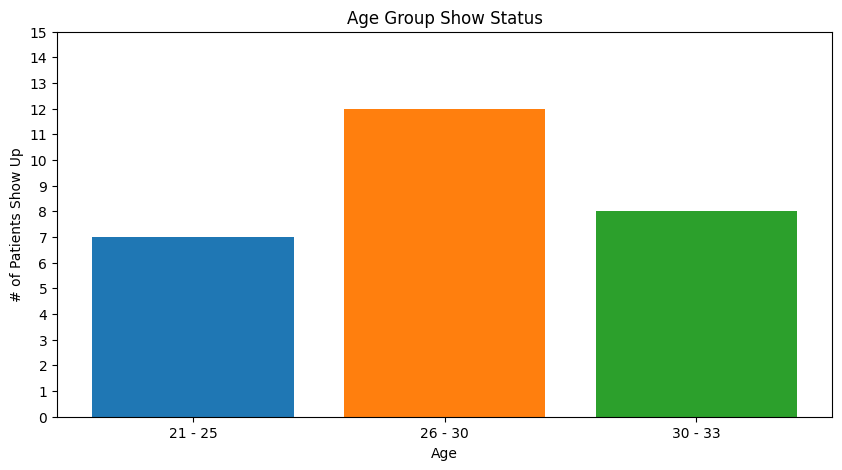

In [ ]:
fig = plt.figure(figsize = (10, 5))
data2 = data1.loc[data1['AgeGroup'] == '21 - 25']
data3 = data1.loc[data1['AgeGroup'] == '26 - 30']
data4 = data1.loc[data1['AgeGroup'] == '30 - 33']
plt.bar(data2['AgeGroup'], data2['PT_ATTEND_NEW_APT_Y'].sum())
plt.bar(data3['AgeGroup'], data3['PT_ATTEND_NEW_APT_Y'].sum())
plt.bar(data4['AgeGroup'], data4['PT_ATTEND_NEW_APT_Y'].sum())
plt.title('Age Group Show Status')
plt.xlabel('Age')
plt.ylabel('# of Patients Show Up')
plt.xticks(ticks = ['21 - 25', '26 - 30', '30 - 33'])
plt.yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.savefig("AgeGroupShow.png")
plt.show()

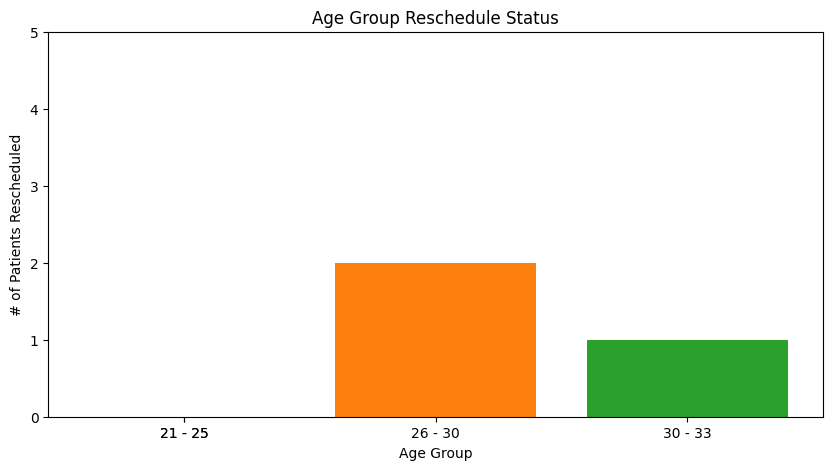

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data2['AgeGroup'], data2['PT_ATTEND_NEW_APT_R'].sum())
plt.bar(data3['AgeGroup'], data3['PT_ATTEND_NEW_APT_R'].sum())
plt.bar(data4['AgeGroup'], data4['PT_ATTEND_NEW_APT_R'].sum())
plt.title('Age Group Reschedule Status')
plt.xlabel('Age Group')
plt.ylabel('# of Patients Rescheduled')
plt.xticks(ticks = ['21 - 25', '26 - 30', '30 - 33', '21 - 25'])
plt.yticks(ticks = [0, 1, 2, 3, 4, 5])
plt.savefig("AgeGroupReschedule.png")
plt.show()

#AGE GROUP ANALYSIS
Based on the bar graphs above that analyze the 'show status' and the 'reschedule status' of patients in the test group, based on age group, we can determine that younger patients benefited from the intervention because all of the patients from the 21 - 25 age group showed up for their appointments after intervention. We can also see that 2 patients from the 26 - 30 year old age group and 1 patient from the 30 - 33 year old age group called to reschedule their appointments. None of the other patients from those age groups missed appointments so we can conclude that intervention has a positive effect on all black males with HIV from ages 21 - 33.

In [ ]:
data5 = data1.loc[data1['Year'] == '2013 - 2016']
data6 = data1.loc[data1['Year'] == '2017 - 2018']
data7 = data1.loc[data1['Year'] == '2019 - 2021']

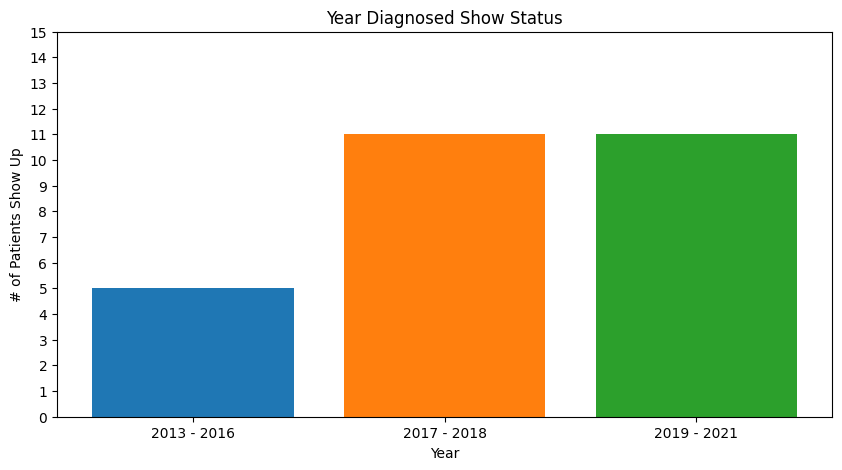

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data5['Year'], data5['PT_ATTEND_NEW_APT_Y'].sum())
plt.bar(data6['Year'], data6['PT_ATTEND_NEW_APT_Y'].sum())
plt.bar(data7['Year'], data7['PT_ATTEND_NEW_APT_Y'].sum())
plt.title('Year Diagnosed Show Status')
plt.xlabel('Year')
plt.ylabel('# of Patients Show Up')
plt.xticks(ticks = ['2013 - 2016', '2017 - 2018', '2019 - 2021'])
plt.yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15])
plt.savefig("YearDiagnosedShow.png")
plt.show()

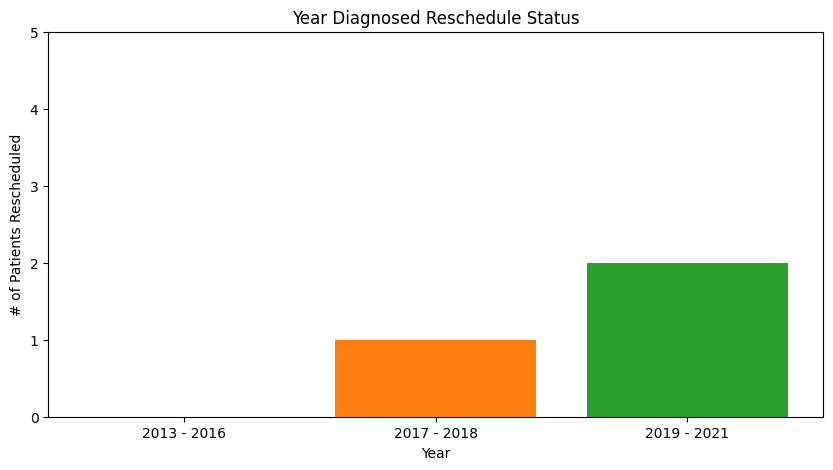

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data5['Year'], data5['PT_ATTEND_NEW_APT_R'].sum())
plt.bar(data6['Year'], data6['PT_ATTEND_NEW_APT_R'].sum())
plt.bar(data7['Year'], data7['PT_ATTEND_NEW_APT_R'].sum())
plt.title('Year Diagnosed Reschedule Status')
plt.xlabel('Year')
plt.ylabel('# of Patients Rescheduled')
plt.xticks(ticks = ['2013 - 2016', '2017 - 2018', '2019 - 2021'])
plt.yticks(ticks = [0, 1, 2, 3, 4, 5])
plt.savefig("YearDiagnosedRescheduled.png")
plt.show()

#YEAR OF DIAGNOSIS ANALYSIS
Based on the bar graphs above, which illustrate the 'show status' and 'reschedule status' of patients in the test group, based on the year of their diagnosis, we can see the long term patients were better at keeping their appointments after intervention. There was 1 patient who rescheduled in the diagnosis group 2017 - 2018 and 2 patients who rescheduled in the diagnosis group 2019 - 2021, this shows a slight correlation between the shorter the patient has the illness, the less likely they are to keep the appointment after intervention.

In [ ]:
data8 = data1.loc[data1['Employment'] == 'unemployed']
data9 = data1.loc[data1['Employment'] == 'employed']

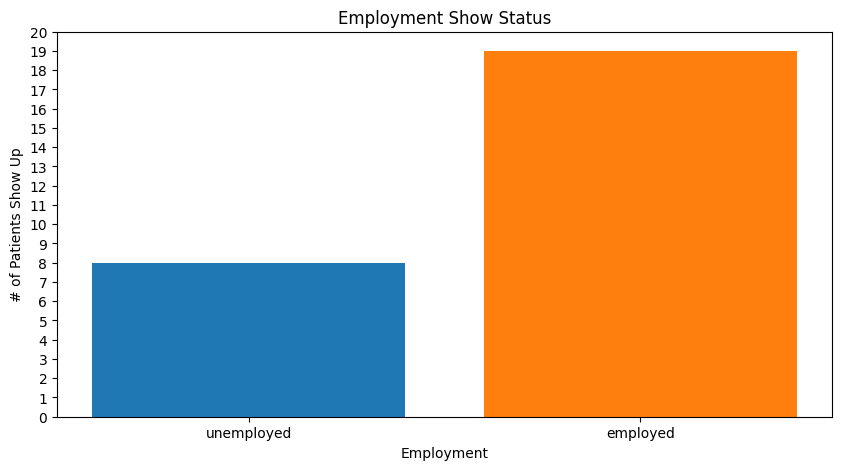

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data8['Employment'], data8['PT_ATTEND_NEW_APT_Y'].sum())
plt.bar(data9['Employment'], data9['PT_ATTEND_NEW_APT_Y'].sum())
plt.title('Employment Show Status')
plt.xlabel('Employment')
plt.ylabel('# of Patients Show Up')
plt.yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.savefig("EmploymentShow.png")
plt.show()

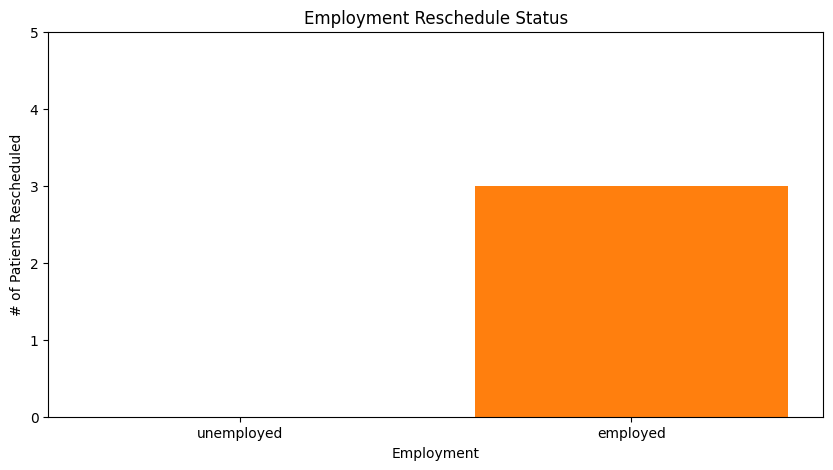

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data8['Employment'], data8['PT_ATTEND_NEW_APT_R'].sum())
plt.bar(data9['Employment'], data9['PT_ATTEND_NEW_APT_R'].sum())
plt.title('Employment Reschedule Status')
plt.xlabel('Employment')
plt.ylabel('# of Patients Rescheduled')
plt.yticks(ticks = [0, 1, 2, 3, 4, 5])
plt.savefig("EmploymentReschedule.png")
plt.show()

#EMPLOYMENT ANALYSIS
Based on the bar graphs above, which illustrate the 'show status' and 'reschedule status' of patients in the test group, based on their employment status, we can see the unemployed patients were better at keeping their appointments after intervention. Out of all patients in the test group, only the employed patients called to reschedule while all of the unemployed patients kept their appointments. We can see only 3 patients from the employed group called to reschedule so overall it can be concluded that intervention was very effective at helping patients keep their appointments.